# Feature Engineering

## Handle Missing Values

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Missing copletemly at random
 If there isno relationship betweeen data and missing values is ther perfect example of missing valeu at random no relation but if u see in age and cabin they ARE realted so they r not example of missing value

In [6]:

df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


## Second type :
###### 2. Missing data not at random/ Systematic missing value:
If there is relationship betweeen data and missing values 
* Age and Cabin

In [7]:
import numpy as np
df["cabin_null"] = np.where(df["Cabin"].isnull(),1,0)
df['cabin_null'].mean()*100

np.float64(77.10437710437711)

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [9]:
df.groupby("Survived")["cabin_null"].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

#### 3. Missing at random:
Men -> hide their salary
women -> hide thier age

# Techinques of handling missing values
1. Mean/Medium/mode replacement
2. Random sample imputation
3. Capturing NaN values with a new feature
4. End of Disturbution imputation
5. Arbitaray Imputation
6. Fequent category imputation



# Mean/Medium/mode replacement:(most used)(categorila or discrete feature)
When to apply:
when data is missing completely at random  we replace Nan with most fequent occurance of varibale

In [10]:
df.isnull().sum()/df.shape[0]*100 ## percentage

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
cabin_null      0.000000
dtype: float64

In [11]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)

In [12]:
median = df.Age.median()
median

np.float64(28.0)

In [13]:
impute_nan(df,"Age",median)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0


In [14]:
print(df['Age'].std())
print(df["Age_median"].std())

14.526497332334042
13.019696550973201


# Eda

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

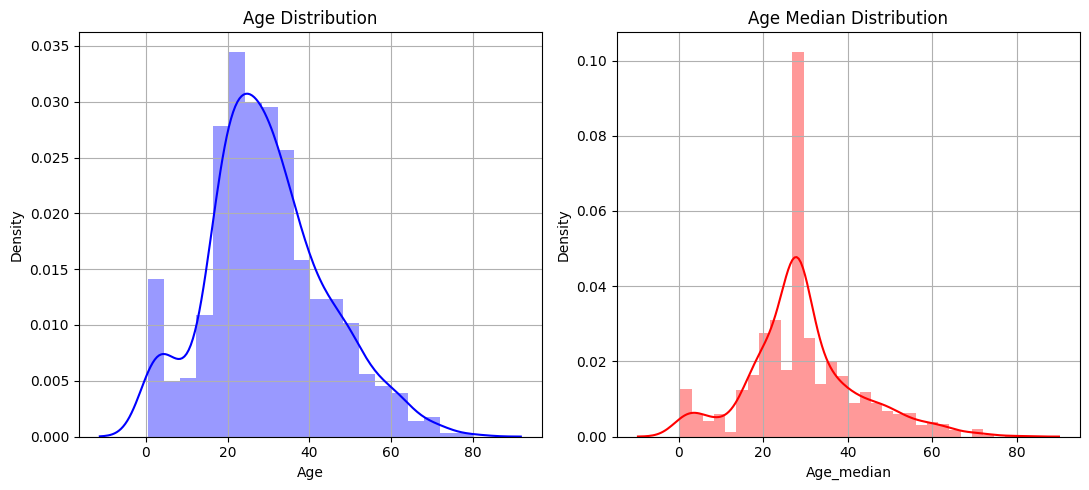

In [16]:
plt.figure(figsize=(11, 5))
plt.subplot(1,2,1)
sns.distplot(df["Age"], kde= True , color = 'blue')
plt.title("Age Distribution")
plt.grid()
plt.subplot(1, 2, 2)
sns.distplot(df['Age_median'], kde= True, color='red')
plt.title('Age Median Distribution')
plt.grid()
plt.tight_layout()
plt.show()

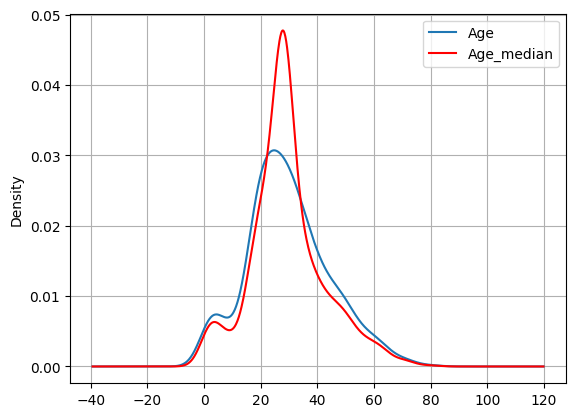

In [17]:
fig = plt.figure() 
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc= "best")
plt.grid()

#### DisAdvantages:
1. There is change and distorition in data
2. Impacts correlation 

## Random sample imputation:(most used)


* It takes random obersvation from dataset and we use this obeverstion to replace the nan values
  ###### when should we use it?
* It assumes that data is missing completely at random 

In [18]:
df1 = df.copy()

In [19]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
cabin_null       0
Age_median       0
dtype: int64

In [20]:
df1.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
cabin_null      0.000000
Age_median      0.000000
dtype: float64

In [21]:
# we have put some random sample in place of Nan values

In [22]:
df1['Age'].dropna().sample(df1["Age"].isnull().sum(),random_state = 0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [23]:
def impute_nan(df1, variable, median):
    # Fill missing values with median
    df1[variable + "_median"] = df1[variable].fillna(median)
    # Fill missing values with random samples
    df1[variable + "_random"] = df1[variable]
    random_sample = df1[variable].dropna().sample(df1[variable].isnull().sum(), random_state=0)
    # Assign random sample to the missing values
    random_sample.index = df1[df1[variable].isnull()].index
    df1.loc[df1[variable].isnull(), variable + "_random"] = random_sample
# Compute median
median = df1['Age'].median()
# Impute missing values
impute_nan(df1, "Age", median)
# Display the DataFrame
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,Age_median,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0,35.0


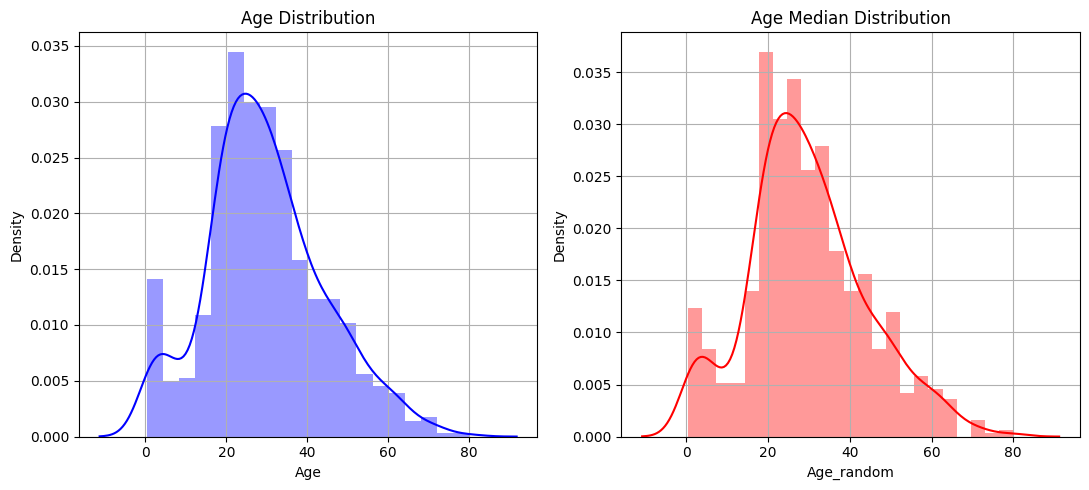

In [24]:
plt.figure(figsize=(11, 5))
plt.subplot(1,2,1)
sns.distplot(df1["Age"], kde= True , color = 'blue')
plt.title("Age Distribution")
plt.grid()
plt.subplot(1, 2, 2)
sns.distplot(df1['Age_random'], kde= True, color='red')
plt.title('Age Median Distribution')
plt.grid()
plt.tight_layout()
plt.show()

# all graph doing same thing

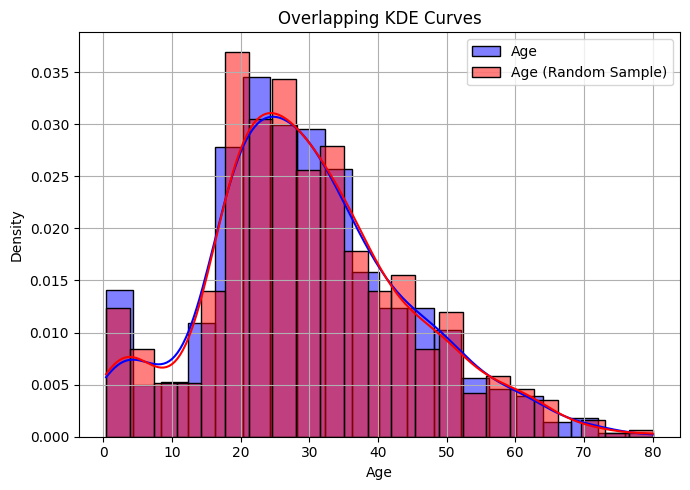

In [25]:
plt.figure(figsize=(7,5))

# Plot KDE for Age
sns.histplot(df1['Age'], kde=True, color='blue', label='Age', stat='density')

# Plot KDE for Age_random
sns.histplot(df1['Age_random'], kde=True, color='red', label='Age (Random Sample)', stat='density')

# Add titles and labels
plt.title('Overlapping KDE Curves')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

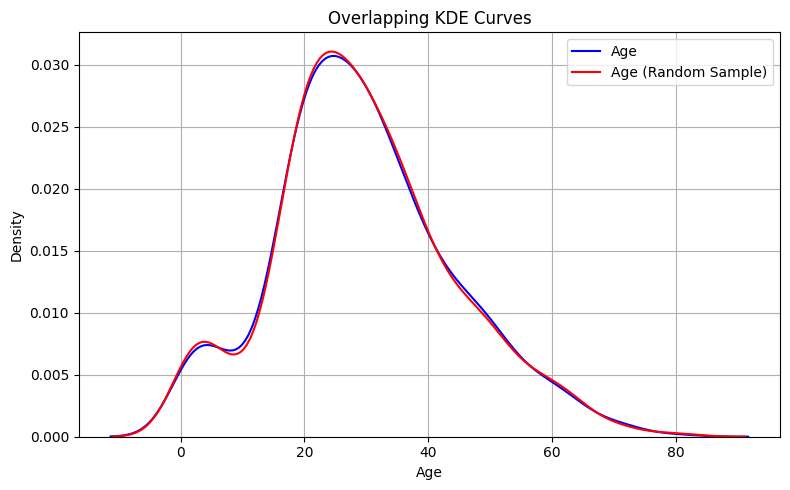

In [26]:
# Plotting KDE curves only
plt.figure(figsize=(8,5))

# Plot KDE for Age
sns.kdeplot(df1['Age'], color='blue', label='Age', linestyle='-')

# Plot KDE for Age_random
sns.kdeplot(df1['Age_random'], color='red', label='Age (Random Sample)', linestyle='-')

# Add titles and labels
plt.title('Overlapping KDE Curves')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

###### Disadvantage
   * every situation randomness doesnot work

## Capturing NaN values with a new feature

* If data is not completely missing at random

In [27]:
# Copy only the 'Age' and 'Cabin' columns
df2 = df[['Age', 'Cabin']].copy()
df2.isnull().sum()

Age      177
Cabin    687
dtype: int64

In [28]:
df2["Age_null"] = np.where(df['Age'].isnull(),1,0)

In [29]:
df2.head(3)

,Age,Cabin,Age_null
0,22.0,NaN,0
1,38.0,C85,0
2,26.0,NaN,0


In [30]:
df.Age.median()

np.float64(28.0)

In [31]:
df2["Age"].fillna(df.Age.median(),inplace = True)

## Advantages:
* captures the importace of missing values
## Disadvantage:
* Creating aditional features(cures of dimensionaltiy)

# End of Distribution imputation ( in order to remove the impact of outlier removal)

In [32]:
df3 = pd.read_csv("titanic.csv", usecols = ['Age','Cabin'])

<Axes: >

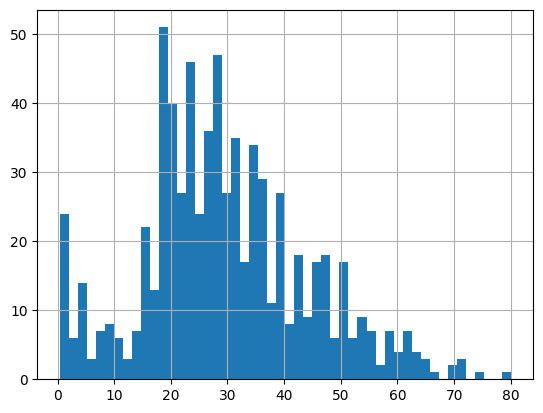

In [33]:
df3.Age.hist(bins = 50)

In [35]:
# we will take far end beween 70-80

In [36]:
extreme = df3.Age.mean()+3* df.Age.std()  # we will take 3 std 

<Axes: xlabel='Age'>

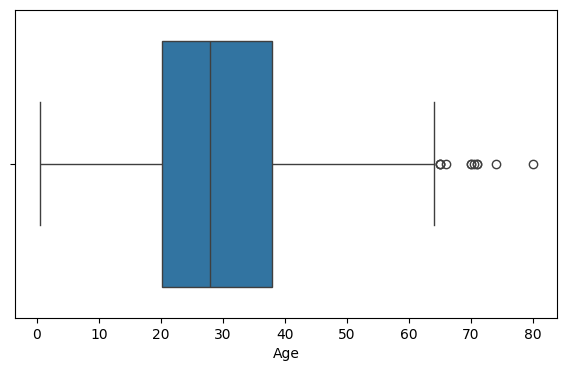

In [37]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Age', data=df3)

In [38]:
def impute_nan(df3,variable,median,extreme):
    df3[variable+"_end_distribution"] = df3[variable].fillna(extreme)
    df3[variable].fillna(median , inplace= True)

In [39]:
impute_nan(df3 , 'Age' , df3.Age.median() , extreme)

In [40]:
df3.head()

,Age,Cabin,Age_end_distribution
0,22.0,NaN,22.0
1,38.0,C85,38.0
2,26.0,NaN,26.0
3,35.0,C123,35.0
4,35.0,NaN,35.0


<Axes: >

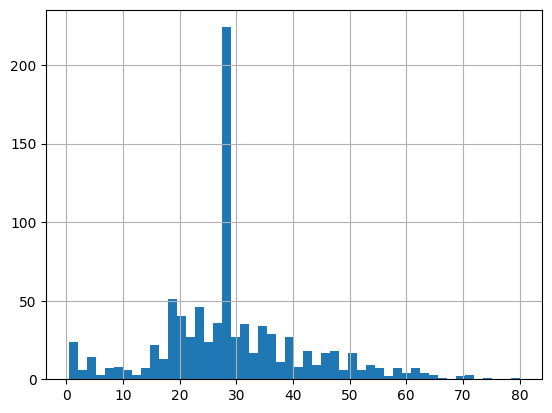

In [41]:
df3["Age"].hist(bins = 50)

<Axes: >

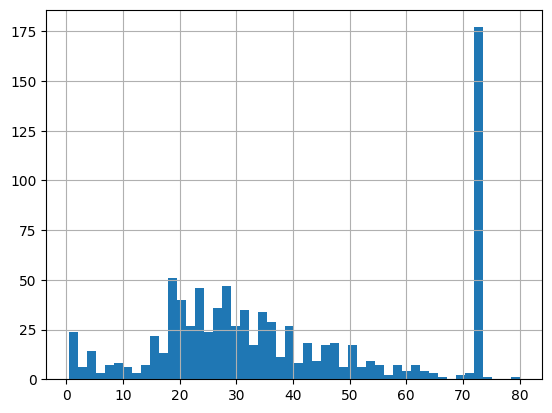

In [42]:
df3["Age_end_distribution"].hist(bins = 50)

### to cehck which graph is correct we draw a boxplot

<Axes: xlabel='Age_end_distribution'>

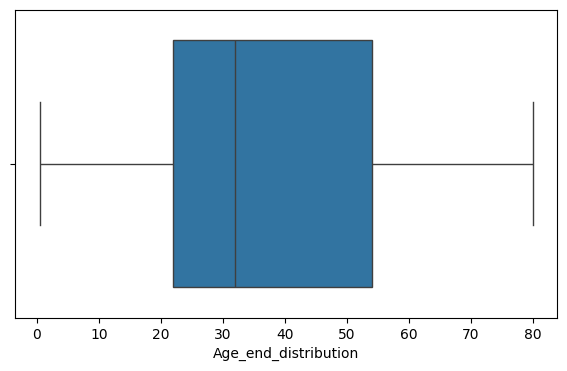

In [43]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Age_end_distribution', data=df3)

# Arbitaray Imputation(can skip it)

it consist of replacing Nan by an arbitraray value  

In [44]:
df4 = pd.read_csv("titanic.csv", usecols = ['Age','Cabin', "Survived"])

In [45]:
df4.head()

,Survived,Age,Cabin
0,0,22.0,NaN
1,1,38.0,C85
2,1,26.0,NaN
3,1,35.0,C123
4,0,35.0,NaN


In [50]:
def impute_nan(df4,variable):
    df4[variable +"_zero"] = df4[variable].fillna(0)
    df4[variable +"_hunderd"] = df4[variable].fillna(100)

<Axes: >

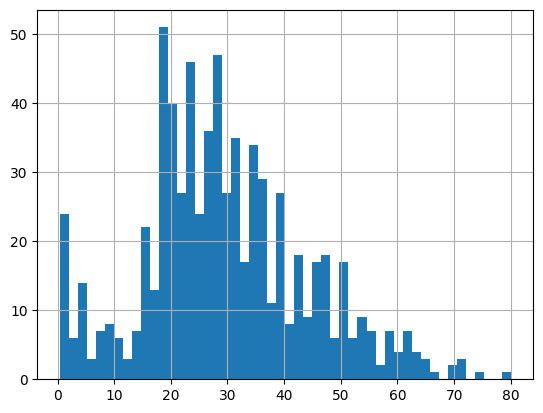

In [47]:
df4["Age"].hist(bins = 50)

### Arbitaray Values:
#### It should be more frequently present
#### find out importance of the missing values
#### we can use max or minimum value 0-10 and 70 -80

In [ ]:
# Fequent category imputation: